In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, ee, geemap, rasterio
from glob import glob
from osgeo import gdal, gdalconst
from rasterio.plot import show
import rioxarray as rxr
from rio_cogeo.profiles import cog_profiles
from rasterio.merge import merge

In [2]:
#ee.Authenticate()
ee.Initialize()

In [3]:
cwd = os.getcwd()
dat_dir = os.path.join(cwd, 'Data')

In [4]:
#'EPSG:32750' UTM
#'EPSG:4326' WGS84
#'EPSG:4283' GDA 94
#'EPSG:28350' MGA Zone 50
dirs = glob(dat_dir +'/*/' , recursive = True)
matches = []
for match in dirs:
    if "South West" in match or 'Metro' in match:
        matches.append(match)
        
for folder in matches:
    subdir = glob(folder +'/*/' , recursive = True)
    files_to_mosaic = glob(folder + '/*.tif')
    xres=5
    yres=5
    NODATA_VALUE = -9999
    aff = subdir[0].split('\\')[-3]
    aff_spl = aff.split(' ')
    if len(aff_spl) > 1:
        aff_up = "_".join(aff_spl)
    else:
        aff_up = aff
        
    res = (
        gdal.Warp(subdir[0] + aff_up + '.tif' , files_to_mosaic, srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:28350',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE ,
                 xRes=xres, yRes=yres, resampleAlg=gdalconst.GRA_Cubic)
        )
    res = None
    

In [7]:
res = (
        gdal.Warp(os.path.join(dat_dir, 'South West\\South West mosaic\\South_West_wgs.tif') ,
                 os.path.join(dat_dir, 'South West\\South West mosaic\\South_West.tif'),
                srcSRS = 'EPSG:28350',
                dstSRS = 'EPSG:4326',
                srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE,
                resampleAlg=gdalconst.GRA_Cubic)
        )
res = None

In [10]:
res = (
        gdal.Warp(os.path.join(dat_dir, 'Metro\\TwoRocks_wgs.tif') ,
                 os.path.join(dat_dir, 'Metro\\TwoRocks_5m.tif'),
                srcSRS = 'EPSG:28350',
                dstSRS = 'EPSG:4326',
                srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE,
                resampleAlg=gdalconst.GRA_Cubic)
        )
res = None

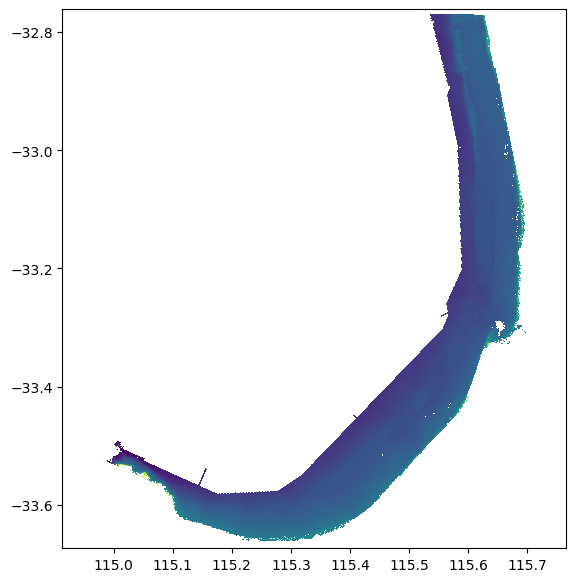

<AxesSubplot:>

In [8]:
plt.rcParams['figure.figsize'] = [7, 7]
SW_path = os.path.join(dat_dir, 'South West\\South West mosaic\\South_West_wgs.tif')
bath_SW = rasterio.open(SW_path)
show(bath_SW, interpolation =  'nearest')

In [5]:
raster = gdal.Open(os.path.join(dat_dir, 'template\\CockburnSound_10m.tif'))
gt =raster.GetGeoTransform()
print(gt)
cellx = gt[1]
celly =-gt[5]

(115.52487127645085, 4.951507234286625e-05, 0.0, -32.09020324419037, 0.0, -4.951507234286542e-05)


In [8]:
#0.000050
SW_path = os.path.join(dat_dir, 'South West\\South West mosaic\\South_West_wgs.tif')
sw_out = os.path.join(dat_dir, 'South West\\South West mosaic\\WGS84\\South_West_wgs_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(sw_out , SW_path , srcSRS = 'EPSG:4326',
                 dstSRS = 'EPSG:4326',
                 xRes=cellx, yRes=celly,
                 srcNodata = NODATA_VALUE,
                 dstNodata = NODATA_VALUE, 
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [9]:
cog_sw = os.path.join(dat_dir, 'South West\\South West mosaic\\WGS84\\COG\\South_West_10m.tif')
geemap.image_to_cog(sw_out, cog_sw)
geemap.cog_validate(cog_sw, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\South West\South West mosaic\WGS84\South_West_wgs_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\South West\South West mosaic\WGS84\COG\South_West_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\South West\\South West mosaic\\WGS84\\COG\\South_West_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=17241, Height=18433, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(114.9129826332898, -33.6738475675716, 115.76667199555315, -32.76113623907556), Origin=(114.9129826332898, -32.76113623907556), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=9, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Leve

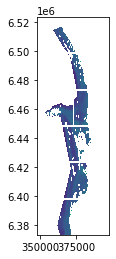

<AxesSubplot:>

In [14]:
met_path = os.path.join(dat_dir, 'Metro\\Metro mosaic\\Metro.tif')
bath_met = rasterio.open(met_path)
show(bath_met)

In [16]:
#0.000050
met_out = os.path.join(dat_dir, 'Metro\\Metro mosaic\\WGS84\\Metro_wgs.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(met_out , met_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 resampleAlg=gdalconst.GRA_Cubic)
        )

res = None

In [18]:
cog_sw = os.path.join(dat_dir, 'South West\\South West mosaic\\WGS84\\COG\\South_West.tif')
geemap.image_to_cog(sw_out, cog_sw)
geemap.cog_validate(cog_sw, verbose=True)

In [26]:
cog_met = os.path.join(dat_dir, 'Metro\\Metro mosaic\\WGS84\\COG\\Metro.tif')
geemap.image_to_cog(met_out, cog_met)
geemap.cog_validate(cog_met, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Metro\Metro mosaic\WGS84\Metro_wgs.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Metro\Metro mosaic\WGS84\COG\Metro.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Metro\\Metro mosaic\\WGS84\\COG\\Metro.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=11979, Height=29605, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(115.37178727603415, -32.77333309367069, 115.92145679835588, -31.41487527512702), Origin=(115.37178727603415, -31.41487527512702), Resolution=(4.5886094191645797e-05, -4.5886094191645797e-05), MinZoom=9, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=119

In [10]:
#0.000050
tr_path = os.path.join(dat_dir, 'Metro\\TwoRocks_5m.tif')
tr_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\TwoRocks_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(tr_out , tr_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

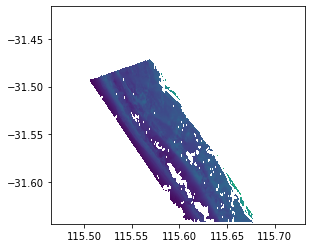

<AxesSubplot:>

In [24]:
bath_tr = rasterio.open(tr_out)
show(bath_tr)

In [11]:
cog_tr = os.path.join(dat_dir, 'Test COGs\\COGs\\TwoRocks_10m.tif')
geemap.image_to_cog(tr_out, cog_tr)
geemap.cog_validate(cog_tr, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\TwoRocks_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\TwoRocks_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\TwoRocks_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=5383, Height=4612, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(115.46554386886838, -31.644139370622952, 115.73208350329003, -31.415775856977657), Origin=(115.46554386886838, -31.415775856977657), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=10, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=5383, Height

In [14]:
#0.000050
esp_path = os.path.join(dat_dir, 'South Coast\\Esperance_B1_5m.tif')
esp_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\Esperance_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(esp_out , esp_path , srcSRS = 'EPSG:28351',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [15]:
cog_esp = os.path.join(dat_dir, 'Test COGs\\COGs\\Esperance_10m.tif')
geemap.image_to_cog(esp_out, cog_esp)
geemap.cog_validate(cog_esp, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\Esperance_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\Esperance_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\Esperance_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=1309, Height=1302, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(121.8872611949386, -33.888939391807, 121.95207642463541, -33.82447076761659), Origin=(121.8872611949386, -33.82447076761659), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=12, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'DataType': 'Generic', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description='Band_1', ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=

In [18]:
#0.000050
cs_path = os.path.join(dat_dir, 'Metro\\CockburnSound_5m.tif')
cs_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\CockburnSound_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(cs_out , cs_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [19]:
cog_cs = os.path.join(dat_dir, 'Test COGs\\COGs\\CockburnSound_10m.tif')
geemap.image_to_cog(cs_out, cog_cs)
geemap.cog_validate(cog_cs, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\CockburnSound_10m.tif.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\CockburnSound_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\CockburnSound_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=5422, Height=4609, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(115.52858490687635, -32.321290086814074, 115.79705562911937, -32.093075118385805), Origin=(115.52858490687635, -32.093075118385805), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=10, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=5422, H

In [20]:
jur_path = os.path.join(dat_dir, 'Mid West\\Jurien_5m.tif')
jur_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\Jurien_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(jur_out , jur_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [21]:
cog_jur = os.path.join(dat_dir, 'Test COGs\\COGs\\Jurien_10m.tif')
geemap.image_to_cog(jur_out, cog_jur)
geemap.cog_validate(cog_jur, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\Jurien_10m.tif.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\Jurien_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\Jurien_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=544, Height=819, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(115.02365363105473, -30.31130012894863, 115.05058983040925, -30.270747284699823), Origin=(115.02365363105473, -30.270747284699823), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=14, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=544, Height=819, 

In [26]:
br_path = os.path.join(dat_dir, 'Kimberley\\Broome_5m.tif')
br_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\Broome_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(br_out , br_path , srcSRS = 'EPSG:28351',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [27]:
cog_br = os.path.join(dat_dir, 'Test COGs\\COGs\\Broome_10m.tif')
geemap.image_to_cog(br_out, cog_br)
geemap.cog_validate(cog_br, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\Broome_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\Broome_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\Broome_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=1290, Height=671, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(122.19373355616592, -18.015518087270344, 122.25760799948822, -17.98229347372828), Origin=(122.19373355616592, -17.98229347372828), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=13, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=1290, Height=671,

In [29]:
ex_path = os.path.join(dat_dir, 'Gascoyne\\Exmouth_5m.tif')
ex_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\Exmouth_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(ex_out , ex_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [30]:
cog_ex = os.path.join(dat_dir, 'Test COGs\\COGs\\Exmouth_10m.tif')
geemap.image_to_cog(ex_out, cog_ex)
geemap.cog_validate(cog_ex, verbose=True)

C:\Users\stanm\anaconda3\envs\TerraWise\lib\site-packages\rio_cogeo\cogeo.py:192: IncompatibleBlockRasterSize: Block Size are bigger than raster sizes. Setting blocksize to 256
  warnings.warn(
Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\Exmouth_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\Exmouth_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\Exmouth_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=452, Height=988, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(114.13019768164166, -21.979749720570858, 114.15257849434063, -21.930828829096107), Origin=(114.13019768164166, -21.930828829096107), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=14, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=452, Height=988

In [32]:
lanc_path = os.path.join(dat_dir, 'Mid West\\Lancelin_5m.tif')
lanc_out = os.path.join(dat_dir, 'Test COGs\\WGS84\\Lancelin_10m.tif')
NODATA_VALUE = -9999
res = (
        gdal.Warp(lanc_out , lanc_path , srcSRS = 'EPSG:28350',
                 dstSRS = 'EPSG:4326',
                 srcNodata = NODATA_VALUE, dstNodata = NODATA_VALUE, 
                 xRes=cellx, yRes=celly,
                 resampleAlg=gdalconst.GRA_Bilinear)
        )

res = None

In [34]:
cog_lance = os.path.join(dat_dir, 'Test COGs\\COGs\\Lance_10m.tif')
geemap.image_to_cog(lanc_out, cog_lance)
geemap.cog_validate(cog_ex, verbose=True)

Reading input: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\WGS84\Lancelin_10m.tif

Adding overviews...
Updating dataset tags...
Writing output to: C:\Users\stanm\Git\WA-bathymetry-mosaics\Data\Test COGs\COGs\Lance_10m.tif


Info(Path='C:\\Users\\stanm\\Git\\WA-bathymetry-mosaics\\Data\\Test COGs\\COGs\\Exmouth_10m.tif', Driver='GTiff', COG=True, Compression='DEFLATE', ColorSpace=None, COG_errors=None, COG_warnings=None, Profile=Profile(Bands=1, Width=452, Height=988, Tiled=True, Dtype='float32', Interleave='BAND', AlphaBand=False, InternalMask=False, Nodata=-9999.0, ColorInterp=('gray',), ColorMap=False, Scales=(1.0,), Offsets=(0.0,)), GEO=Geo(CRS='EPSG:4326', BoundingBox=(114.13019768164166, -21.979749720570858, 114.15257849434063, -21.930828829096107), Origin=(114.13019768164166, -21.930828829096107), Resolution=(4.951507234286625e-05, -4.951507234286542e-05), MinZoom=14, MaxZoom=15), Tags={'Image Metadata': {'AREA_OR_POINT': 'Area', 'OVR_RESAMPLING_ALG': 'NEAREST'}, 'Image Structure': {'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND', 'LAYOUT': 'COG'}}, Band_Metadata={'Band 1': BandMetadata(Description=None, ColorInterp='gray', Offset=0.0, Scale=1.0, Metadata={})}, IFD=[IFD(Level=0, Width=452, Height=988